In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

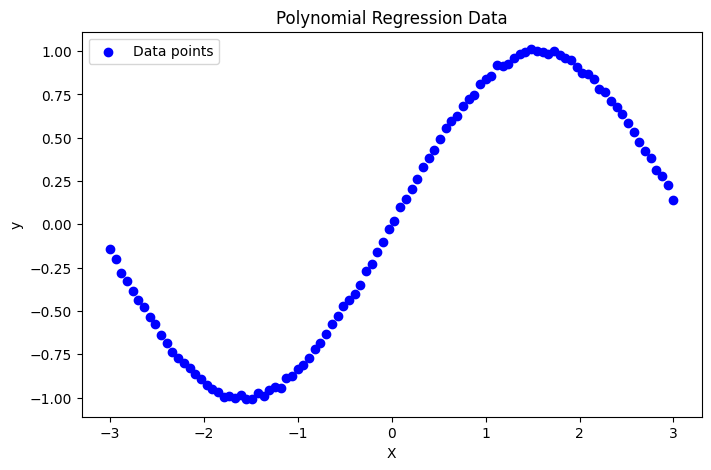

In [84]:
# Number of samples
n_samples = 100

# Generate random x values
X = np.linspace(-3, 3, n_samples)
# Generate y values with a quadratic relationship plus some noise
y = np.sin(X) + np.random.randn(n_samples) * 0.01

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Data')
plt.legend()
plt.show()

In [85]:
def generate_polynomial_features(X, order):
    polynomial_features = [X**i for i in range(order, -1, -1)]
    # Stack the features column-wise
    X_poly = np.column_stack(polynomial_features)
    return X_poly

## Polynomial Regression Model Build

In [154]:
class PolynomialRegressionModel:
    def __init__(self, lr=0.001, order=2):
        self.lr = lr
        self.order = order
        self.w = np.random.randn(order + 1) # last weight is actually bias; w2*x^2 + w1*x + w0
        self.history = []
    
    def fit(self, X, y, epoch):
        samples = len(X)
        X_poly = generate_polynomial_features(X, self.order)
        for _ in range(epoch):
            y_pred = np.dot(self.w, X_poly.T)
            
            self.history.append(self.w.tolist())
            for i in range(self.order + 1):
                self.w[i] -= self.lr * np.sum((-2 / samples) * X_poly[:, i] * (y - y_pred))

In [160]:
order = 4
clf = PolynomialRegressionModel(lr=0.001, order=order)
clf.fit(X, y, epoch=4000)

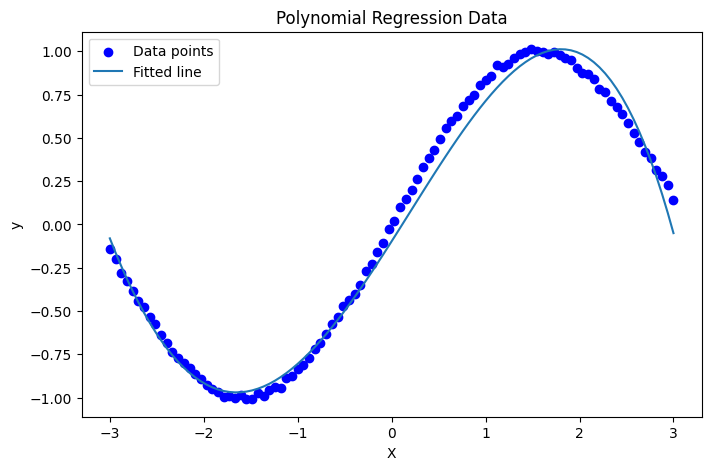

In [161]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
X_poly = generate_polynomial_features(X, order)
plt.plot(X, np.dot(clf.w, X_poly.T), label="Fitted line")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Data')
plt.legend()
plt.show()

In [162]:
np.save("./train_data_X.npy", X)
np.save("./train_data_X_poly.npy", X_poly)
np.save("./train_data_y.npy", y)
np.save("./weights.npy", clf.history)